---

# 2. Machine Learning with Python 3 (Project 3, K Nearest Neighbours)

# Goal: 

## Classification of the Customers of a Company via knn Algorithm

# _00. Import Main Libraries_

# _01. Load the Data and Explore the Basics of It_

# _02. Train-Test Split and Normalization_

# _03. Classification via knn_

# _04. Evaluation of the Model Success_

# _05. Optimization Loop for k_

---
---
---

# _00. Import Main Libraries_

In [122]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
import itertools

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import NullFormatter

# _01. Load the Data and Explore the Basics of It_

In [123]:
df = pd.read_csv("teleCust1000t.csv")

df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   ed       1000 non-null   int64  
 7   employ   1000 non-null   int64  
 8   retire   1000 non-null   float64
 9   gender   1000 non-null   int64  
 10  reside   1000 non-null   int64  
 11  custcat  1000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 93.9 KB


In [125]:
df[["custcat"]].value_counts()

# 1- Basic Service 
# 2- E-Service 
# 3- Plus Service 
# 4- Total Service

custcat
3          281
1          266
4          236
2          217
dtype: int64

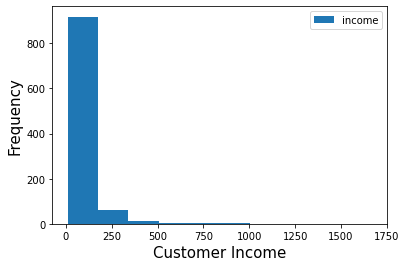

In [126]:
df[["income"]].plot.hist()

plt.xlabel("Customer Income", fontsize = 15)
plt.ylabel("Frequency",fontsize = 15)
plt.show()

# _02. Train-Test Split and Normalization_

In [127]:
# predictors

X = df.drop('custcat',axis=1)

In [128]:
# target var

y = df[["custcat"]]

In [129]:
# train-test split and float casting

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train, X_test = X_train.astype(float), X_test.astype(float)

In [130]:
# observe the shape of the train and test sets

print ('Train set (X_train, y_train):\n', X_train.shape,  y_train.shape)

print ('\nTest set (X_test, y_test):\n', X_test.shape,  y_test.shape)

Train set (X_train, y_train):
 (800, 11) (800, 1)

Test set (X_test, y_test):
 (200, 11) (200, 1)


In [131]:
from sklearn.preprocessing import StandardScaler

In [132]:
# normalize X_train

scaler1 = StandardScaler()

scaler1.fit(X_train)

X_train1 = scaler1.transform(X_train)

X_test1 = scaler1.transform(X_test)

# _03. Classification via knn_

In [133]:
from sklearn.neighbors import KNeighborsClassifier

In [134]:
# start with k as 4 then fit the knn model

k = 4

neigh4 = KNeighborsClassifier(n_neighbors = k).fit(X_train1,y_train.custcat)

neigh4

KNeighborsClassifier(n_neighbors=4)

In [135]:
# predict with test data

yhat = neigh4.predict(X_test1)

yhat[0:5]



array([1, 1, 1, 3, 1], dtype=int64)

# _04. Evaluation of the Model Success_

In [136]:
# accuracy classification score (Jaccard Index)

from sklearn import metrics

print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh4.predict(X_train1)))

print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))


# Train set Accuracy:  0.56625
# Test set Accuracy:  0.34

Train set Accuracy:  0.56625
Test set Accuracy:  0.34


# _05. Optimization Loop for k_

In [137]:
kMax = 30

mean_acc_scores = np.zeros(kMax)

std_acc_scores = np.zeros(kMax)


for k in range(1,kMax+1):
    
    neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train1,y_train.custcat)
    
    yhat = neigh.predict(X_test1)
    
    mean_acc_scores[k-1] = metrics.accuracy_score(y_test, yhat)
    
    
print( "The best accuracy with test data was", mean_acc_scores.max(), "via k=", mean_acc_scores.argmax()+1) 

The best accuracy with test data was 0.4 via k= 25
